<h1>Customer Churn</h1>

Hier wird es darum gehen, ob Kunden bei bestimmten Bedingungen ehe dazu neigen, die Bank zu verlassen.

Dataset:

> Bank Customer Churn Dataset: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset [Letzter Zugriff: 03.07.2024]

In [31]:
# Imports.
import pandas  as pd
import numpy   as np
import seaborn as sn

import matplotlib.pyplot as plt

In [32]:
# Lade CSV.
churn_df = pd.read_csv('./data/archive.zip', compression='zip')
churn_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
# 12 Features und 10.000 Einträge.
churn_df.shape

(10000, 12)

In [34]:
churn_df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

Die meisten Features sind schon numerisch. <br>
Das Feature "customer_id" liefert uns keinen Mehrwert, also wird es gedropt. 

In [35]:
churn_df.drop(['customer_id'], axis='columns', inplace=True)
churn_df.head(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [36]:
# Nutze unique(), um Werte von bestimmten Spalten anzuzeigen. 
# - np.setdiff1d: löscht Einträge die wir nicht brauchen.
for col in np.setdiff1d(churn_df.columns, ['age', 'balance', 'balance', 'estimated_salary', 'credit_score']):
    print(f'{col}:')
    print(churn_df[col].unique())

active_member:
[1 0]
churn:
[1 0]
country:
['France' 'Spain' 'Germany']
credit_card:
[1 0]
gender:
['Female' 'Male']
products_number:
[1 3 2 4]
tenure:
[ 2  1  8  7  4  6  3 10  5  9  0]


In [37]:
churn_df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Als Nächstes müssen die nicht-numerischen Features codiert werden. 

In [38]:
target   = ['France', 'Spain', 'Germany'] 
ersetzen = [0, 1, 2]

for target, replace in zip(target, ersetzen):
    churn_df.replace(target, replace, inplace=True)

churn_df['country'].values

C:\Users\Alexander\AppData\Local\Temp\ipykernel_20572\1410523213.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn_df.replace(target, replace, inplace=True)


array([0, 1, 0, ..., 0, 2, 0], dtype=int64)

In [40]:
# On-Hot Encode Gender
churn_df['gender'] = pd.get_dummies(churn_df['gender'], drop_first=True, dtype='int')
# Female: 0, Male: 1
churn_df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [41]:
churn_df.dtypes

credit_score          int64
country               int64
gender                int32
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

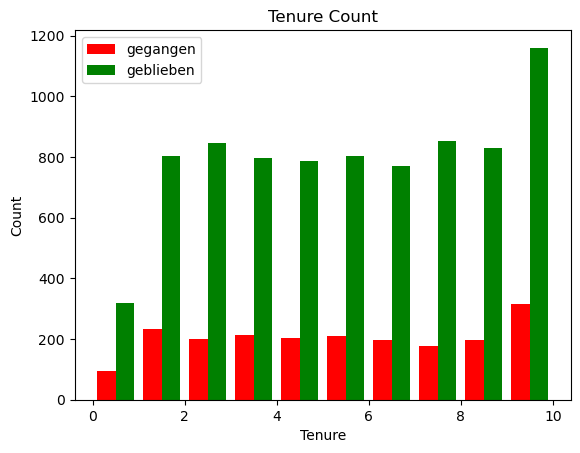

In [47]:
# tenure: Wie lange ist diese Person ein Kunde gewesen?
# - In Jahren, siehe Dataset Beschreibung.

plt.title("Tenure Count")
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.hist([ churn_df[churn_df['churn']==1].tenure, churn_df[churn_df['churn']==0].tenure ], \
        color=['red', 'green'],  label=['gegangen', 'geblieben'])
plt.legend()

In [52]:
# Sind die Klassen ausgeglichen? 
churn_df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

C:\Users\Alexander\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

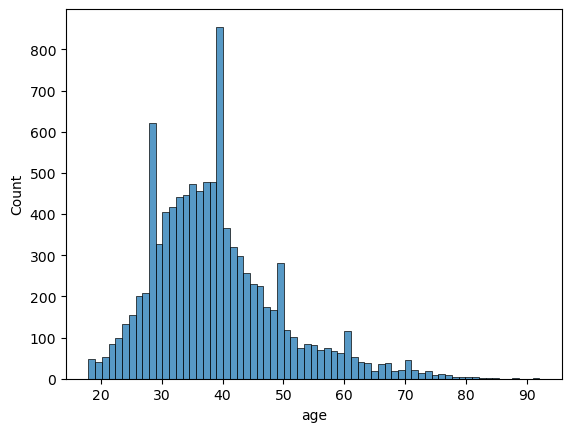

In [111]:
# Wie ist das Alter aufgeteilt? 
sn.histplot(churn_df['age'])

Customer Churn Datasets sind meist unbalanciert. Später werden wir es mit einer Methode balancieren.

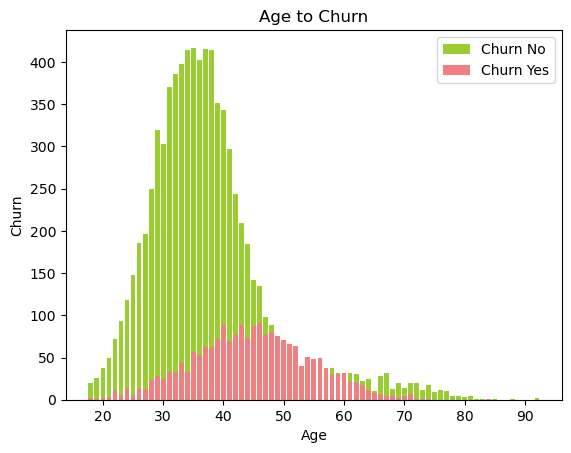

In [127]:
# Age zu Churn.

# Wie viele sind im Alter gegangen?
plt.title("Age to Churn")
plt.xlabel("Age")
plt.ylabel('Churn')

churn_yes = churn_df[['age', 'churn']].loc[churn_df['churn']==1].groupby('age')['churn'].value_counts().unstack(fill_value=0)
churn_no = churn_df[['age', 'churn']].loc[churn_df['churn']==0].groupby('age')['churn'].value_counts().unstack(fill_value=0)
plt.bar(churn_no.index,  churn_no[0],   label='Churn No',  color="yellowgreen")
plt.bar(churn_yes.index, churn_yes[1],  label='Churn Yes', color="lightcoral")
plt.legend()

Auf diesem Plot sieht man, dass das Alter der Personen hauptsächlich in dem Bereich 25 bis 60 liegt. Die jüngeren Leute bleiben eher und ab dem Alter von 35 steigt die Anzahl der die Gehen. Ab da könnte man diesen Leuten Angebote unterbreiten, um diese zum Bleiben anzuregen.

Man sieht auch einige Wucherungen nach rechts, wo es wenig Daten gibt. Weit rechts stehende Werte sind Outlier.

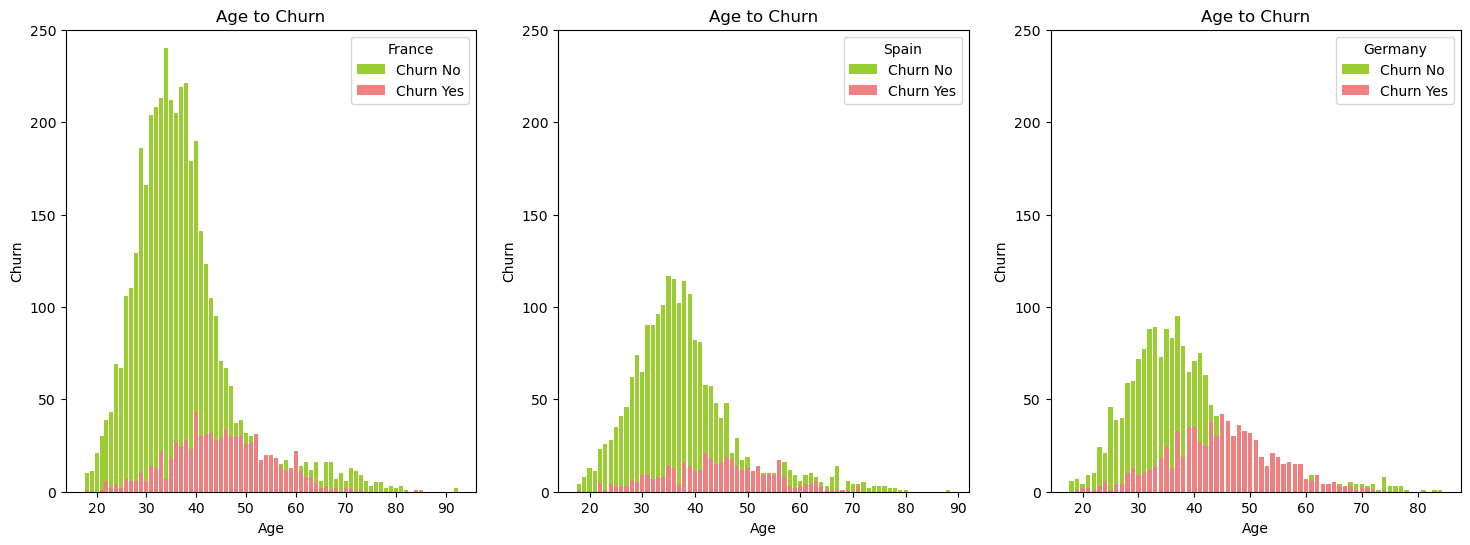

In [217]:
country = ['France', 'Spain', 'Germany'] 

fig, axs = plt.subplots(1,3, figsize=(18, 6))
axs = axs.ravel()


for i in range(3):
    churn_no = churn_df[['age', 'churn', 'country']].loc[(churn_df['churn']==0) & (churn_df['country']==i) ].groupby('age')['churn'].value_counts().unstack(fill_value=0)
    churn_yes = churn_df[['age', 'churn', 'country']].loc[(churn_df['churn']==1) & (churn_df['country']==i) ].groupby('age')['churn'].value_counts().unstack(fill_value=0)
    axs[i].set_title("Age to Churn")
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel('Churn')
    axs[i].set_ylim(0, 250)
    axs[i].bar(churn_no.index,  churn_no[0],    label='Churn No',  color="yellowgreen")
    axs[i].bar(churn_yes.index,  churn_yes[1],  label='Churn Yes', color="lightcoral")
    axs[i].legend(title=country[i])

Durch das Spezifizieren der Länder kann untersucht werden, welche Gegebenheiten dazu führen, dass Leute bleiben oder gehen. Das ist wichtig, da in jedem Land andere Regeln gelten und Menschen sich anders verhalten mögen, doch gibt es Ähnlichkeiten.

In [169]:
churn_yes = churn_df[['country', 'churn']].loc[churn_df['churn']==1].groupby('country')['churn'].value_counts().unstack(fill_value=0)
churn_yes

churn,1
country,
0,810
1,413
2,814
